In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


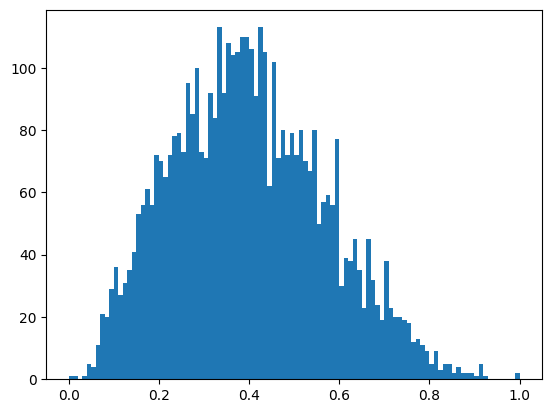

In [3]:
plt.hist(df.target, 100)
_ = plt.plot()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [5]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

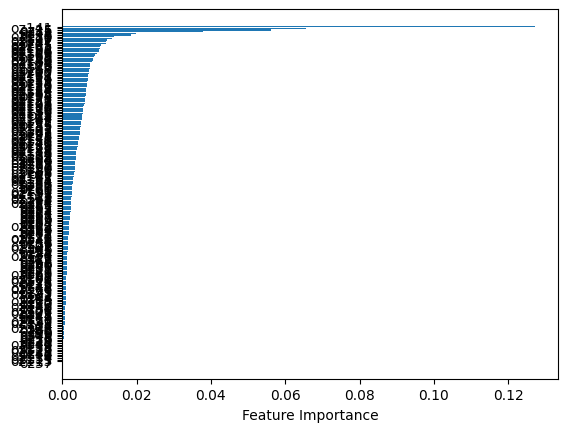

In [7]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [8]:
rf.feature_importances_[sort][-10:]

array([0.01179   , 0.01201346, 0.01334874, 0.01388866, 0.01851902,
       0.0198211 , 0.03800078, 0.05608997, 0.06555254, 0.12708483])

In [9]:
df.data.columns[sort][-10:]

Index(['oz47', 'oz197', 'oz112', 'oz20', 'oz137', 'oz18', 'oz48', 'oz35',
       'oz15', 'oz141'],
      dtype='object')

In [10]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz146,oz56,oz169,oz163,oz109,oz158,oz198,oz162,oz155,oz201,oz47,oz197,oz112,oz20,oz137,oz18,oz48,oz35,oz15,oz141
0,0.011997,0.126277,0.352613,0.059438,0.076923,0.800120,0.039213,0.319206,0.752291,0.127564,0.102941,0.505899,0.000000,0.000000,0.000000,0.0625,0.312855,0.0,0.000000,0.041308
1,0.025932,0.422015,0.352625,0.122765,0.153846,0.791224,0.326584,0.306084,0.745984,0.475618,0.389706,0.683820,0.222222,0.242424,0.278945,0.0625,0.297041,0.4,0.282828,0.212274
2,0.007666,0.000000,0.352400,0.153984,0.076923,0.798276,0.204885,0.406309,0.753298,0.497968,0.257353,0.499219,0.000000,0.388889,0.000000,0.1250,0.288557,0.0,0.388889,0.063643
3,0.021463,0.000000,0.352497,0.110089,0.076923,0.800965,0.023469,0.327848,0.767469,0.134458,0.198529,0.630533,0.000000,0.095238,0.039437,0.0000,0.310692,0.1,0.111111,0.031193
4,0.006780,0.000000,0.352417,0.075031,0.076923,0.802893,0.111398,0.329857,0.741548,0.295913,0.154412,0.516053,0.000000,0.260870,0.000000,0.0625,0.286581,0.0,0.304348,0.063643


In [11]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.3978618144747218

In [12]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 58)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.44381262022693313

In [14]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

In [16]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [18]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [19]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [20]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [21]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [22]:
X_train["target"] = y_train

In [23]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [24]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [25]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [26]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [27]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-27-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


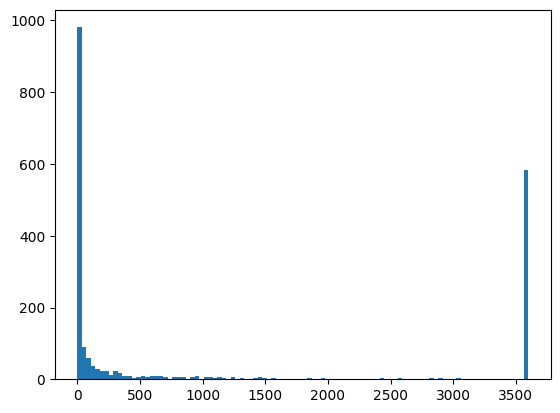

In [28]:
plt.hist(df.target, 100)
_ = plt.plot()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [30]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

In [31]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


## 1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

In [32]:
df = fetch_openml("mtp", version=1)
X = df.data
y = df.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
rf = RandomForestRegressor(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=42)

In [ ]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
num_features = []
test_scores = []

In [ ]:
for n in range(1, len(sorted_indices)+1):
    selected_features = sorted_indices[:n]
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    num_features.append(n)
    test_scores.append(model.score(X_test_selected, y_test))

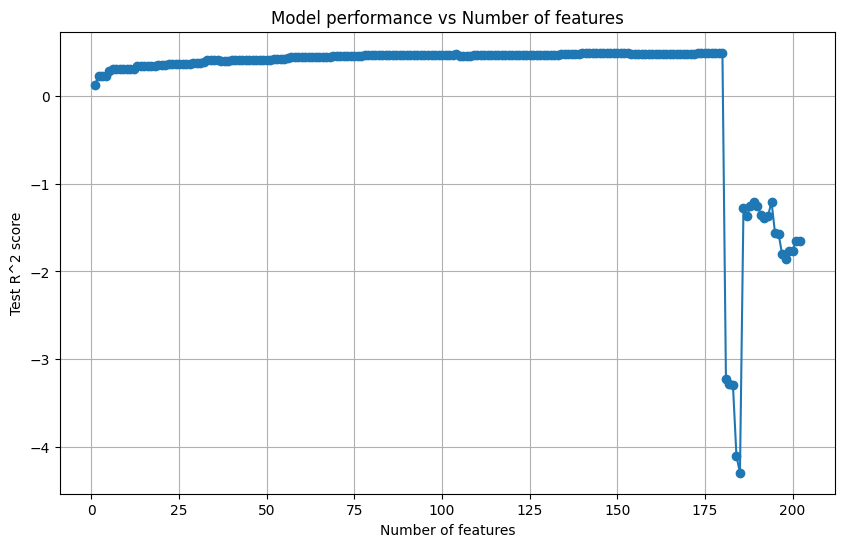

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_features, test_scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Test R^2 score')
plt.title('Model performance vs Number of features')
plt.grid(True)
plt.show()

In [ ]:
best_n = num_features[np.argmax(test_scores)]
best_score = max(test_scores)
print(f"Optimal number of features: {best_n} with R^2 score: {best_score:.4f}")

Optimal number of features: 152 with R^2 score: 0.4918


## 2. Используйте другие методы отбора признаков:
- Исключение низкодисперсных признаков;
- Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);
- Рекурсивное исключение признаков;
- Последовательное включение признаков;
- Исключение по L1-норме (гребневой регрессии).

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import (VarianceThreshold, SelectKBest,
                                      f_regression, mutual_info_regression,
                                      RFE, SequentialFeatureSelector,
                                      SelectFromModel)
from sklearn.linear_model import LassoCV

In [ ]:
df = fetch_openml("mtp", version=1, as_frame=True)
X = df.data
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Исключение низкодисперсных признаков

In [ ]:
def variance_threshold_selection():
    thresholds = np.linspace(0, 1, 20)
    scores = []

    for thresh in thresholds:
        selector = VarianceThreshold(threshold=thresh)
        X_train_sel = selector.fit_transform(X_train_scaled)
        X_test_sel = selector.transform(X_test_scaled)

        if X_train_sel.shape[1] == 0:
            scores.append(0)
            continue

        model = LinearRegression()
        model.fit(X_train_sel, y_train)
        scores.append(model.score(X_test_sel, y_test))

    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, scores, marker='o')
    plt.title("Variance Threshold Selection")
    plt.xlabel("Threshold")
    plt.ylabel("R2 Score")
    plt.grid()
    plt.show()

    best_thresh = thresholds[np.argmax(scores)]
    print(f"Best threshold: {best_thresh:.2f}, Features kept: {(X_train_scaled.var(axis=0) > best_thresh).sum()}")

Отбор по статистическим критериям

In [ ]:
def statistical_test_selection():
    methods = [
        ('Pearson Correlation', f_regression),
        ('Mutual Information', mutual_info_regression)
    ]

    for name, method in methods:
        scores = []
        for k in range(1, X_train_scaled.shape[1]+1):
            selector = SelectKBest(method, k=k)
            X_train_sel = selector.fit_transform(X_train_scaled, y_train)
            X_test_sel = selector.transform(X_test_scaled)

            model = LinearRegression()
            model.fit(X_train_sel, y_train)
            scores.append(model.score(X_test_sel, y_test))

        plt.figure(figsize=(10, 5))
        plt.plot(range(1, X_train_scaled.shape[1]+1), scores, marker='o')
        plt.title(f"Feature Selection using {name}")
        plt.xlabel("Number of features")
        plt.ylabel("R2 Score")
        plt.grid()
        plt.show()

        best_k = np.argmax(scores) + 1
        print(f"{name}: Best k={best_k}, R2={max(scores):.4f}")

Рекурсивное исключение признаков

In [ ]:
def recursive_feature_elimination():
    scores = []
    for n_features in range(1, X_train_scaled.shape[1]+1):
        selector = RFE(LinearRegression(), n_features_to_select=n_features)
        X_train_sel = selector.fit_transform(X_train_scaled, y_train)
        X_test_sel = selector.transform(X_test_scaled)

        model = LinearRegression()
        model.fit(X_train_sel, y_train)
        scores.append(model.score(X_test_sel, y_test))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, X_train_scaled.shape[1]+1), scores, marker='o')
    plt.title("Recursive Feature Elimination")
    plt.xlabel("Number of features")
    plt.ylabel("R2 Score")
    plt.grid()
    plt.show()

    best_n = np.argmax(scores) + 1
    print(f"RFE: Best n_features={best_n}, R2={max(scores):.4f}")

Последовательное включение признаков

In [ ]:
def sequential_feature_selection():
    scores = []
    for n_features in range(1, min(20, X_train_scaled.shape[1])+1):
        selector = SequentialFeatureSelector(LinearRegression(),
                                           n_features_to_select=n_features,
                                           direction='forward')
        X_train_sel = selector.fit_transform(X_train_scaled, y_train)
        X_test_sel = selector.transform(X_test_scaled)

        model = LinearRegression()
        model.fit(X_train_sel, y_train)
        scores.append(model.score(X_test_sel, y_test))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(scores)+1), scores, marker='o')
    plt.title("Sequential Feature Selection (Forward)")
    plt.xlabel("Number of features")
    plt.ylabel("R2 Score")
    plt.grid()
    plt.show()

    best_n = np.argmax(scores) + 1
    print(f"SFS: Best n_features={best_n}, R2={max(scores):.4f}")

Отбор по L1-норме

In [ ]:
def l1_based_selection():
    from sklearn.linear_model import LassoCV

    alphas = np.logspace(-4, 2, 20)
    scores = []
    n_features = []

    for alpha in alphas:
        selector = SelectFromModel(LassoCV(alphas=[alpha], cv=3))
        selector.fit(X_train_scaled, y_train)
        X_train_sel = selector.transform(X_train_scaled)
        X_test_sel = selector.transform(X_test_scaled)

        if X_train_sel.shape[1] == 0:
            scores.append(0)
            n_features.append(0)
            continue

        model = LinearRegression()
        model.fit(X_train_sel, y_train)
        scores.append(model.score(X_test_sel, y_test))
        n_features.append(X_train_sel.shape[1])

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.semilogx(alphas, scores, marker='o')
    plt.title("L1 Selection: Score vs Alpha")
    plt.xlabel("Alpha")
    plt.ylabel("R2 Score")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.semilogx(alphas, n_features, marker='o')
    plt.title("L1 Selection: Features vs Alpha")
    plt.xlabel("Alpha")
    plt.ylabel("Number of features")
    plt.grid()

    plt.tight_layout()
    plt.show()

    best_alpha = alphas[np.argmax(scores)]
    print(f"L1 Selection: Best alpha={best_alpha:.4f}, R2={max(scores):.4f}, Features={n_features[np.argmax(scores)]}")

In [ ]:
def compare_all_methods():
    methods = {
        'Variance Threshold': VarianceThreshold(threshold=0.1),
        'Pearson Correlation': SelectKBest(f_regression, k=10),
        'Mutual Information': SelectKBest(mutual_info_regression, k=10),
        'RFE': RFE(LinearRegression(), n_features_to_select=10),
        'L1 Selection': SelectFromModel(LassoCV(cv=3))
    }

    results = {}
    for name, selector in methods.items():
        selector.fit(X_train_scaled, y_train)
        X_train_sel = selector.transform(X_train_scaled)
        X_test_sel = selector.transform(X_test_scaled)

        model = LinearRegression()
        model.fit(X_train_sel, y_train)
        score = model.score(X_test_sel, y_test)
        results[name] = score

    plt.figure(figsize=(10, 5))
    plt.bar(results.keys(), results.values())
    plt.title("Comparison of Feature Selection Methods")
    plt.ylabel("R2 Score")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    print("Method\t\tR2 Score")
    for name, score in results.items():
        print(f"{name:20}\t{score:.4f}")

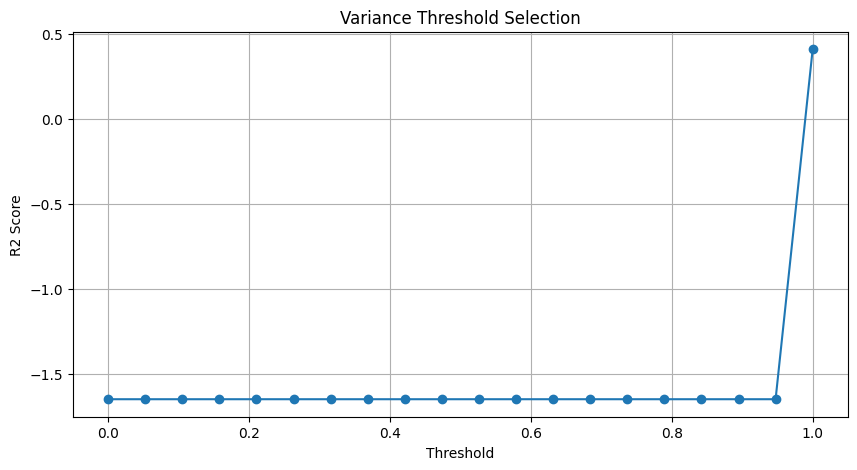

Best threshold: 1.00, Features kept: 49


In [ ]:
variance_threshold_selection()

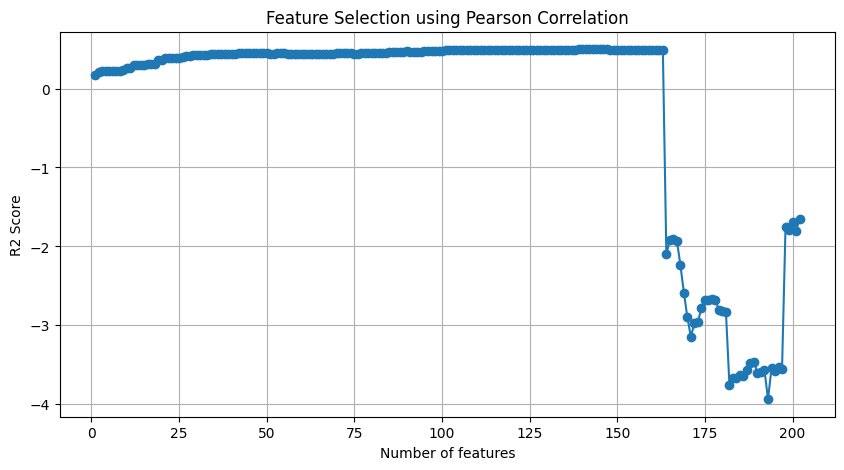

Pearson Correlation: Best k=143, R2=0.4979


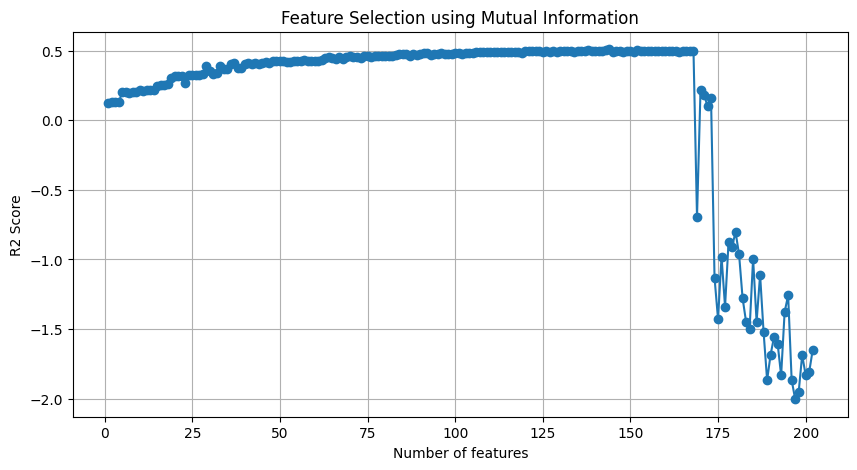

Mutual Information: Best k=144, R2=0.5095


In [ ]:
statistical_test_selection()

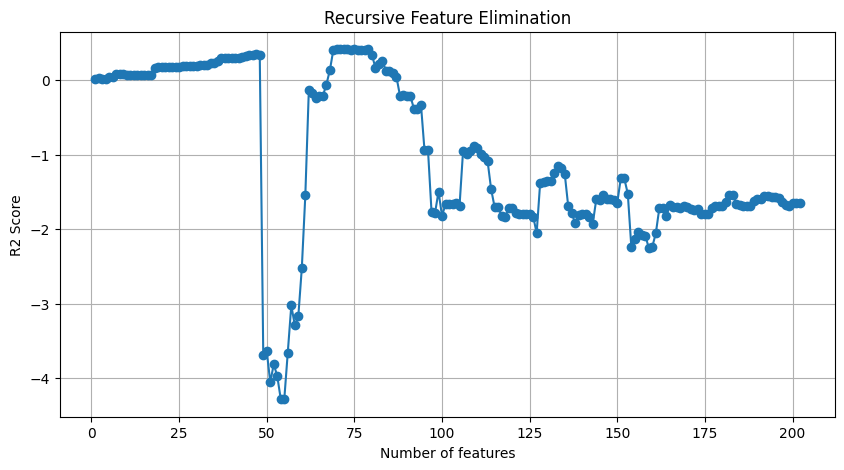

RFE: Best n_features=71, R2=0.4154


In [ ]:
recursive_feature_elimination()

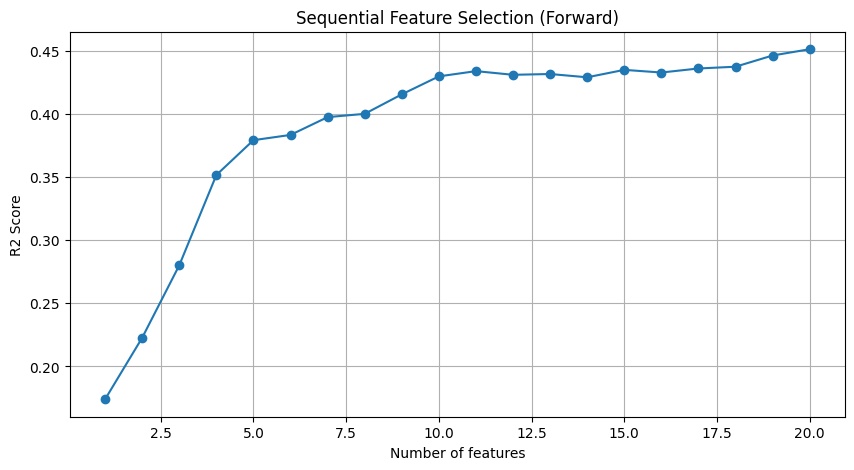

SFS: Best n_features=20, R2=0.4510


In [ ]:
sequential_feature_selection()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9956934161161612, tolerance: 0.006447246087986503
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9172064706835314, tolerance: 0.006335091041639708
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.431490154965079, tolerance: 0.006330165627962427
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: Con

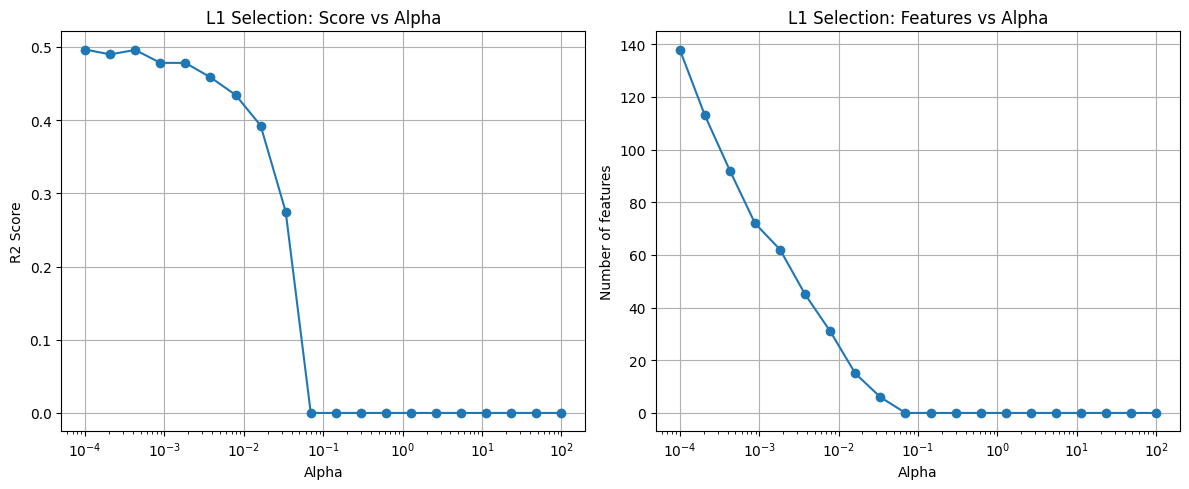

L1 Selection: Best alpha=0.0001, R2=0.4966, Features=138


In [ ]:
l1_based_selection()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0073700940670526904, tolerance: 0.006447246087986503
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026607917209595655, tolerance: 0.006447246087986503
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030614454590455864, tolerance: 0.006447246087986503
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:

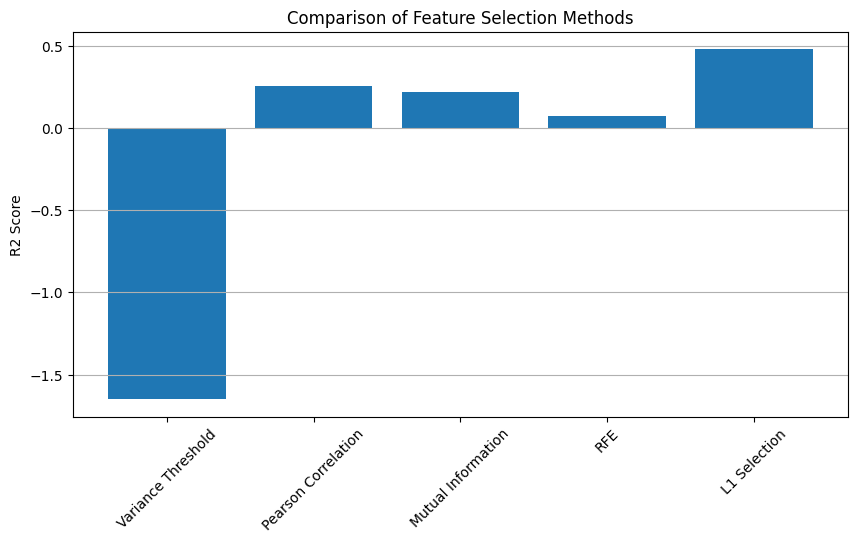

Method		R2 Score
Variance Threshold  	-1.6511
Pearson Correlation 	0.2545
Mutual Information  	0.2232
RFE                 	0.0742
L1 Selection        	0.4793


In [ ]:
compare_all_methods()

## 3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [ ]:
df = fetch_openml("balance-scale", version=1, as_frame=True)
X = df.data
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
print(y_train.value_counts())

class
R    216
L    215
B     37
Name: count, dtype: int64


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.value_counts())

class
B    216
L    216
R    216
Name: count, dtype: int64


In [ ]:
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           B       0.41      0.92      0.56        12
           L       0.97      0.89      0.93        73
           R       0.95      0.83      0.89        72

    accuracy                           0.87       157
   macro avg       0.78      0.88      0.79       157
weighted avg       0.92      0.87      0.88       157



In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
print(y_train_under.value_counts())

class
B    37
L    37
R    37
Name: count, dtype: int64


In [ ]:
model_under = LogisticRegression(max_iter=1000, random_state=42)
model_under.fit(X_train_under, y_train_under)
y_pred_under = model_under.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           B       0.41      0.92      0.56        12
           L       0.98      0.81      0.89        73
           R       0.96      0.93      0.94        72

    accuracy                           0.87       157
   macro avg       0.78      0.89      0.80       157
weighted avg       0.93      0.87      0.89       157



In [ ]:
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smt.value_counts())

class
R    215
B    214
L    213
Name: count, dtype: int64


In [ ]:
model_smt = LogisticRegression(max_iter=1000, random_state=42)
model_smt.fit(X_train_smt, y_train_smt)
y_pred_smt = model_smt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_smt))

              precision    recall  f1-score   support

           B       0.44      0.92      0.59        12
           L       0.97      0.89      0.93        73
           R       0.95      0.86      0.91        72

    accuracy                           0.88       157
   macro avg       0.79      0.89      0.81       157
weighted avg       0.92      0.88      0.89       157



## 4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

In [37]:
df = fetch_openml("CPMP-2015-regression", version=1, as_frame=True)
X = df.data.drop("instance_id", axis=1)
X = pd.get_dummies(X)
y = df.target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

In [42]:
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

R2: 0.8920
MSE: 293002.4003


In [43]:
strategies = ['uniform', 'quantile', 'kmeans']
n_bins_list = [3, 5, 7, 10]

In [44]:
results = []

In [47]:
for strategy in strategies:
    for n_bins in n_bins_list:
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
        y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).ravel()

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train, y_train_binned)
        y_pred_binned = model.predict(X_test)

        accuracy = accuracy_score(y_test_binned, y_pred_binned)
        f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

        results.append({
            'strategy': strategy,
            'n_bins': n_bins,
            'accuracy': accuracy,
            'f1': f1
        })

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [48]:
results_df = pd.DataFrame(results)
print(results_df.pivot_table(index='n_bins', columns='strategy', values=['accuracy', 'f1']))

          accuracy                            f1                    
strategy    kmeans  quantile   uniform    kmeans  quantile   uniform
n_bins                                                              
3         0.914611  0.770398  0.943074  0.892479  0.777501  0.931204
5         0.889943  0.667932  0.918406  0.852381  0.670142  0.891982
7         0.846300  0.601518  0.897533  0.796882  0.604989  0.859206
10        0.817837  0.535104  0.889943  0.755282  0.528386  0.847230


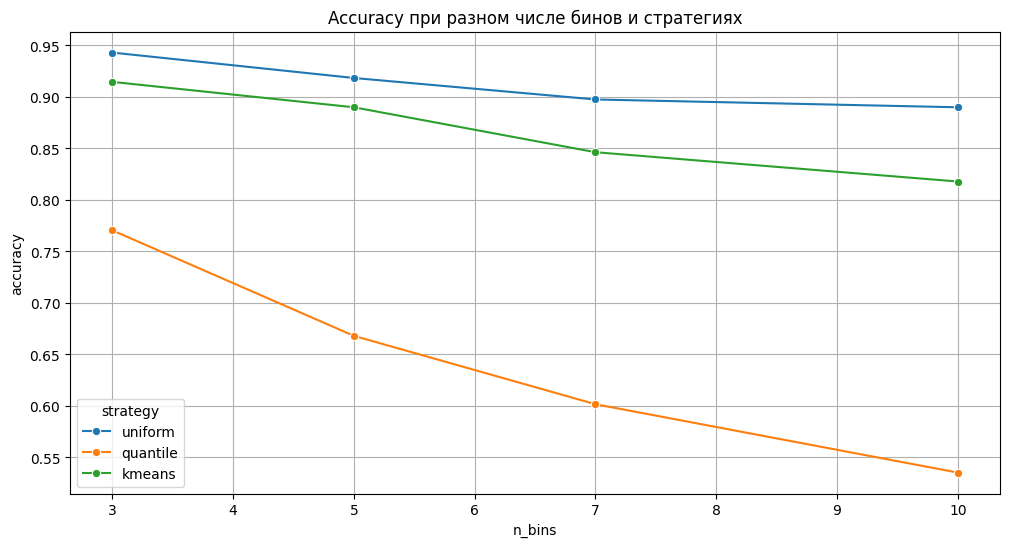

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='n_bins', y='accuracy', hue='strategy', marker='o')
plt.title('Accuracy при разном числе бинов и стратегиях')
plt.grid()
plt.show()

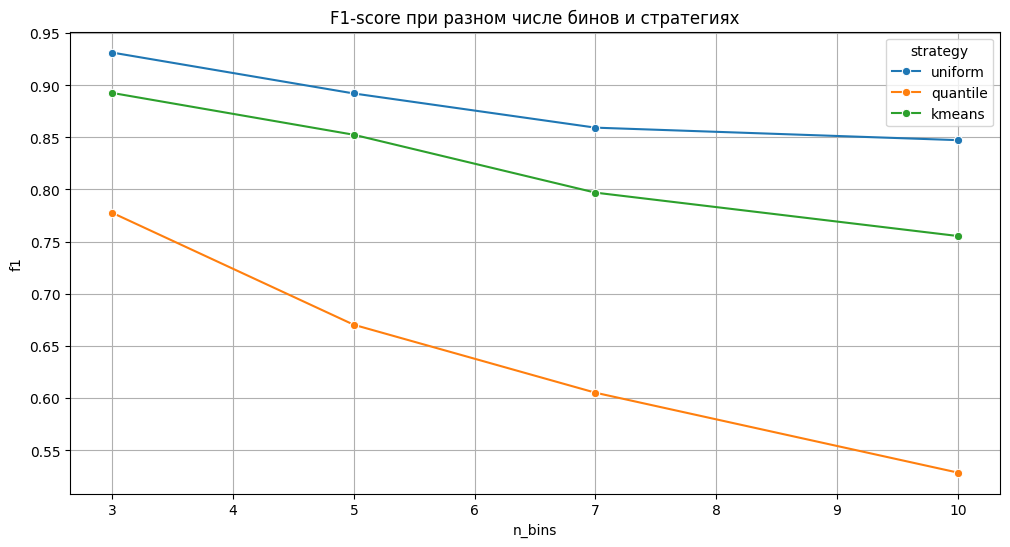

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='n_bins', y='f1', hue='strategy', marker='o')
plt.title('F1-score при разном числе бинов и стратегиях')
plt.grid()
plt.show()

In [53]:
baseline_r2 = r2_score(y_test, y_pred)
print(f"R2 базовой регрессии: {baseline_r2:.4f}")

R2 базовой регрессии: 0.8920


In [54]:
best_classifier = results_df.loc[results_df['f1'].idxmax()]
print(f"\nЛучший классификатор (F1={best_classifier['f1']:.4f}):")
print(f"Стратегия: {best_classifier['strategy']}, Биннов: {best_classifier['n_bins']}")


Лучший классификатор (F1=0.9312):
Стратегия: uniform, Биннов: 3
